# Montaña Rusa de la Era Digital 😎
<hr>

## Para diseñar la nueva montaña rusa, la empresa utilizará técnicas matemáticas avanzadas:

@ Trazador cúbico sujeto para generar una trayectoria suave y continua a lo largo de todo el recorrido.

@ Polinomios de mínimos cuadrados para analizar la estabilidad estructural de la vía, ajustando los datos experimentales de pruebas de tensión y compresión.

@ Polinomios ortogonales para optimizar la forma de ciertos tramos y mejorar la experiencia del usuario.

@ Resolución de un sistema de ecuaciones para determinar las fuerzas en los puntos críticos de la estructura.

#### Mediante este enfoque matemático innovador, la empresa podrá crear una montaña rusa de vanguardia, con una trayectoria fluida, una estructura sólida y una experiencia de usuario excepcional.

<center><img src="Imagenes/meme1.jpeg" width="300px"></center>
<center><img src="Imagenes/meme2.gif" width="300px"></center>

<hr>
<h4>Integrantes</h4>
<h5>
Juan Vargas <br>
Freddy Jaimes <br>
Angel de Leon <br>
</h5>
<hr>

## Tomando los datos de los CSV y de la Estacion espacial internacional mediante una API

In [1]:
using HTTP
using JSON
using DataFrames
using CSV

# Pido los datos a la API
url = "https://api.n2yo.com/rest/v1/satellite/tle/25544&apiKey=T58NBR-Q5NHQE-Y76PS5-59V1"
res = HTTP.get(url)
json = JSON.parse(String(res.body))
puntos_satelites = json["tle"]

#Saco los datos del los CSV
datos_1 = DataFrame(CSV.File("Puntos_1.csv"))
datos_2 = DataFrame(CSV.File("Puntos_2.csv"))
datos_3 = DataFrame(CSV.File("Puntos_3.csv"))

function Listador(data)
    matriz = []
    for fila in eachrow(data)
        # Convertir cada CSV.Row en un Vector de sus valores
        fila_vector = [valor for valor in fila]
        push!(matriz, fila_vector)
    end
    return matriz
end

#Datos para el paso 1
matriz_1 = Listador(datos_1) # Cambiado a datos_3 para coincidir con el archivo activo
#Datos para el paso 2
matriz_2 = Listador(datos_2)
#Datos para el paso 4
matriz_3 = Listador(datos_3)


#Datos para el paso 1
xi_1 = matriz_1[1]
yi_1 = matriz_1[2]

#Datos para el paso 2
xi_2 = matriz_2[1]
yi_2 = matriz_2[2]

#Datos para el paso 4
A = Vector(matriz_3[1]), Vector(matriz_3[2]), Vector(matriz_3[3])
b = matriz_3[4]


print("Datos obtenidos de forma correcta")

Datos obtenidos de forma correcta

<hr>

# Paso 1: Método de Trazador Cúbico Sujeto

Polinomios por tramos: 
 x = [0.0, 1.0]
0.00622009569377987*x^3 + 0.29377990430622*x + 0.5
 x = [1.0, 2.0]
-0.131100478468899*x^3 + 0.411961722488038*x^2 - 0.118181818181818*x + 0.637320574162679
 x = [2.0, 3.0]
0.318181818181818*x^3 - 2.28373205741627*x^2 + 5.27320574162679*x - 2.95693779904306
 x = [3.0, 4.0]
-0.441626794258373*x^3 + 4.55454545454545*x^2 - 15.2416267942584*x + 17.5578947368421
 x = [4.0, 5.0]
0.248325358851675*x^3 - 3.72488038277512*x^2 + 17.8760765550239*x - 26.599043062201


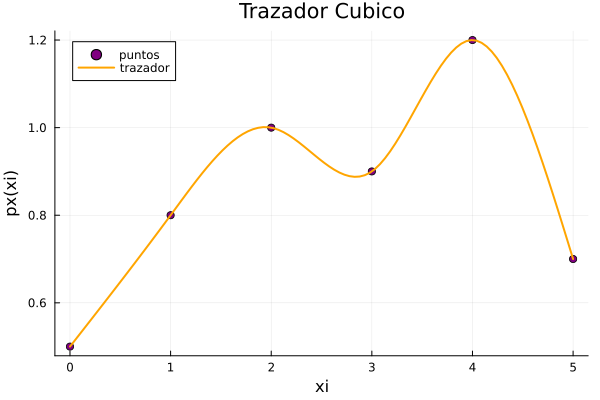

In [4]:
using LinearAlgebra
using SymPy
using Plots

using PyCall

function TrazadorCubico(xi, yi)
    n = length(xi)
    
    #Creando el Valor h
    h = zeros(Float64, n-1)
    for j in 1:n-1
        h[j] = xi[j+1] - xi[j]
    end
    
    # Sistema de Ecuaciones
    A = zeros(Float64, n-2, n-2)
    B = zeros(Float64, n-2)
    S = zeros(Float64, n)
    
    A[1,1] = 2 * (h[1] + h[2])
    A[1,2] = h[2]
    B[1] = 6 * ((yi[3] - yi[2]) / h[2] - (yi[2] - yi[1]) / h[1])
    
    for i in 2:n-3
        A[i,i-1] = h[i]
        A[i,i] = 2 * (h[i] + h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2] - yi[i+1]) / h[i+1]
        factor10 = (yi[i+1] - yi[i]) / h[i]
        B[i] = 6 * (factor21 - factor10)
    end
    
    A[n-2,n-3] = h[n-2]
    A[n-2,n-2] = 2 * (h[n-2] + h[n-1])
    factor12 = (yi[n] - yi[n-1]) / h[n-1]
    factor23 = (yi[n-1] - yi[n-2]) / h[n-2]
    B[n-2] = 6 * (factor12 - factor23)
    
    # Solve the system of equations S
    r = A \ B
    for j in 2:n-1
        S[j] = r[j-1]
    end
    S[1] = 0
    S[n] = 0
    
    # Coeficientes bien pros
    a = zeros(Float64, n-1)
    b = zeros(Float64, n-1)
    c = zeros(Float64, n-1)
    d = zeros(Float64, n-1)
    for j in 1:n-1
        a[j] = (S[j+1] - S[j]) / (6 * h[j])
        b[j] = S[j] / 2
        factor10 = (yi[j+1] - yi[j]) / h[j]
        c[j] = factor10 - (2 * h[j] * S[j] + h[j] * S[j+1]) / 6
        d[j] = yi[j]
    end
    
    # Enviando el polinomio
    x = symbols("x")
    px_tabla = []
    for j in 1:n-1
        pxtramo = a[j] * (x - xi[j])^3 + b[j] * (x - xi[j])^2
        pxtramo += c[j] * (x - xi[j]) + d[j]
        pxtramo = expand(pxtramo)
        push!(px_tabla, pxtramo)
    end
    
    return px_tabla
end

n = length(xi_1)
px_tabla = TrazadorCubico(xi_1, yi_1)
x_vals_1 = range(xi_1[1], xi_1[end], 100)
println("Polinomios por tramos: ")
for tramo in 1:n-1
    println(" x = [$(xi_1[tramo]), $(xi_1[tramo+1])]")
    println("$(px_tabla[tramo])")
end


x = symbols("x")
xtraza = Float64[]
ytraza = Float64[]
y_vals_1 = zeros(Float64, length(x_vals_1))

for tramo in 1:n-1
    a = xi_1[tramo]
    b = xi_1[tramo+1]
    mask = [(x >= a) && (x <= b) for x in x_vals_1]
    
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo]
    pxt = lambdify(pxtramo, [x])
    y_vals_1[mask] = pxt.(x_vals_1[mask])

end

# Gráfica
scatter(xi_1, yi_1, label="puntos", color=:purple)
plot!(x_vals_1, y_vals_1, label="trazador", color=:orange, linewidth=2)
title!("Trazador Cubico")
xlabel!("xi")
ylabel!("px(xi)")
    

<hr>

## Paso 2: Polinomio de Mínimos Cuadrados

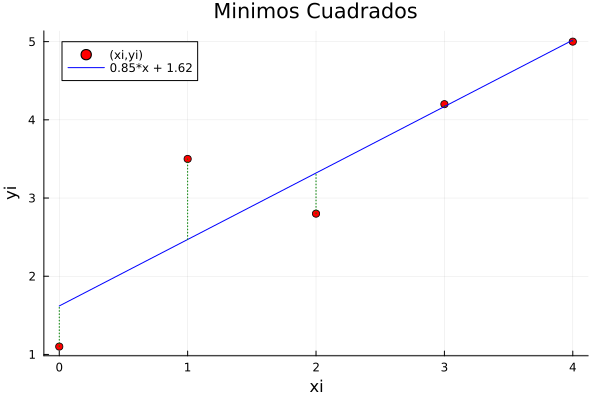

 f = 0.85*x + 1.62
coef_correlación   r  = 0.9046649478535933
coef_determinación r2 = 0.8184186678749447
81.84% de los datos está descrito en el modelo lineal


In [56]:
using Plots
using Statistics
using SymPy

n = length(xi_2)

xm = mean(xi_2)
ym = mean(yi_2)
sx = sum(xi_2)
sy = sum(yi_2)
sxy = sum(xi_2 .* yi_2)
sx2 = sum(xi_2 .^ 2)
sy2 = sum(yi_2 .^ 2)
x_vals_2 = range(xi_2[1], xi_2[end], 100)


a1 = (n * sxy - sx * sy) / (n * sx2 - sx^2)
a0 = ym - a1 * xm

# polinomio grado 1
x = Sym("x")
f = a0 + a1 * x

fx = lambdify(f, [x])

fi = fx.(xi_2)

# coeficiente de correlación
numerador = n * sxy - sx * sy
raiz1 = sqrt(n * sx2 - sx^2)
raiz2 = sqrt(n * sy2 - sy^2)
r = numerador / (raiz1 * raiz2)

# coeficiente de determinacion
r2 = r^2
r2_porcentaje = round(r2 * 100, digits=2)

# SALIDA
println(" f = ", f)
println("coef_correlación   r  = ", r)
println("coef_determinación r2 = ", r2)
println(r2_porcentaje, "% de los datos está descrito en el modelo lineal")

# grafica
scatter(xi_2, yi_2, label="(xi,yi)", color=:red, legend=:topleft, ms=4)
plot!(xi_2, fi, color=:blue, label=f, legend=:topleft, liw=3)

# lineas de error
for i in 1:n
    y0 = min(yi_2[i], fi[i])
    y1 = max(yi_2[i], fi[i])
    plot!([xi_2[i], xi_2[i]], [y0, y1], color=:green, linestyle=:dot, label="",liw=2)
end

xlabel!("tension")
ylabel!("comprension")
title!("Minimos Cuadrados")
display(plot!())

<hr>

## Paso 3: Polinomios Ortogonales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def polinomioLegendre(n, x):

    # Si es el polinomio : P0(x) = 1
    if n == 0:
        return 1

    # Si el polinomio es : P1(x) = x
    elif n == 1:
        return x

    # Si el polinomio es : Pn(x) = (2n-1)x*Pn-1(x) - (n-1)*Pn-2(x)
    else:
        p_n_1 = polinomioLegendre(n-1, x)
        p_n_2 = polinomioLegendre(n-2, x)
        return ((2*n-1)*x*p_n_1 - (n-1)*p_n_2) / n

# Valores de x 
x = np.linspace(-1, 1, 400)

# Genera los polinomios de Legendre de grado 0 a 5
n_values = [0, 1, 2, 3, 4, 5]

valores_legendre = []
for n in n_values:
    valores_legendre.append([polinomioLegendre(n, xi) for xi in x])

# Plot de los Polinomios
plt.figure(figsize=(8, 6))
for i, n in enumerate(n_values):
    plt.plot(x, valores_legendre[i], label=f"P{n} (x)")
    
plt.xlabel("x")
plt.ylabel("Pn (x)")
plt.title("Polinomios de Legendre")
plt.legend()
plt.grid(True) 
plt.ylim(-1.1, 1.1)  
plt.show()


<hr>

## Paso 4: Resolución de Ecuaciones

In [12]:
using PyCall
using LinearAlgebra
using SymPy
using DataFrames
using CSV
using Plots

#defino las incognitas
@syms x1 x2 x3

#creo el vector con las incognitas
v = [x1, x2, x3]

# Lee el archivo CSV
df = CSV.read("Puntos_3.csv", DataFrame)

# Selecciona las filas 2, 3, y 4
matriz1 = df[1:3, :]
b = Vector(df[4, :])
# Convierte las filas seleccionadas en una matriz
A = Matrix(matriz1)
Af = SymPy.Matrix(A)

b = reshape(b, length(b), 1)
bf = SymPy.Matrix(b)

#para mostrar como seria la funcion
res = Af*v




#se imprime con display para que se vea mejor
display(Af)
display(bf)
display(res)

# Se utiliza la función solve de SymPy para resolver el sistema de ecuaciones
solucion = solve(Af * v - bf, v)
#muestro la solucion
display(solucion)

plotly()
valx1 = float(solucion[x1])
valx2 = float(solucion[x2])
valx3 = float(solucion[x3])
# Coordenadas de los puntos críticos (ejemplo genérico, ajustar según sea necesario)
ptsx = [valx1]
ptsy = [valx2]
ptsz = [valx3]

# Crear un gráfico 3D de los puntos críticos
grafico = scatter(ptsx, ptsy, ptsz, title="Punto Crítico ", xlabel="X", ylabel="Y", zlabel="Z", markersize=3, color=:red)


# Mostrar el gráfico
display(grafico)

3×3 Matrix{Int64}:
 1   2   1
 2  -1   1
 3   1  -1

3×1 Matrix{Int64}:
  4
  1
 -2

3-element Vector{Sym{PyObject}}:
 x1 + 2*x2 + x3
 2*x1 - x2 + x3
 3*x1 + x2 - x3

Dict{Sym{PyObject}, Sym{PyObject}} with 3 entries:
  x3 => 7/3
  x1 => -1/5
  x2 => 14/15